# **Problem Formulation** 
We want to find and predict the **Leaf Classification** given the other features Using Neural network .



*   **Input** :- Features collected from
half a million species of plant in the world.
*   **Output** :- Predected species for leaves .


*   **Deep Learning Function** :- Manipulating ,analyzing , preprocessing the data, and training the data. 
*   **Problems** :-
Classification of species has been historically problematic and often results in duplicate identifications.
*   **Objective** :-
The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species.
*   **Challenges** ▶ : 
    1.   Nan cells.
    2.   Unused and unimportnat column.
    3.   Convert the dtype.
    4.   convert strings by One Hot encoding. 
    5.   choose the best hyperparameters for the netwoek.
*   **Impact** ▶ : Predicting the species of the leaf that will lead to a successful match.


**Data Description**:-

* The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

* Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.
----------------------------
**Data fields**:-

* id - an anonymous id unique to an image
* margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
* shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
* texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature




**Copyrights** 2022 Master of science - Queens University -

 by/**Mahmoud Khorshed - Zeyad Tarek - Ahmed Salama**

# Part I :**Data Preparation**

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
from sklearn.model_selection import GridSearchCV

sns.set()
import sys
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
name = 'keras_tuner'
if name not in sys.modules:
  !pip install keras_tuner
  import keras_tuner as kt
else:
  import keras_tuner as kt

from time import time
from collections import Counter

#model selection
from sklearn.model_selection import train_test_split

#Preproccsing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , OneHotEncoder




#DEEP LEARNING
from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

## 1.2 - load Data

### install kaggle and get token Kaggle 

**Download Data**

In [2]:
#!kaggle competitions download -c leaf-classification   #Download data of competition "Leaf Classification"
#updated by zeyad at 2:54 PM
from google.colab import files
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle competitions download -c leaf-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
images.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


### **read data from the *path***

In [3]:
pd.set_option('display.max_colwidth', None)  #to display all row with its data
pd.options.display.max_rows = 1500

#Load Data
import zipfile
#replace it with train zip file path
zf_train = zipfile.ZipFile('/content/train.csv.zip')
all_data=pd.read_csv(zf_train.open('train.csv'),index_col='id') 

#replace it with images zip file path
with zipfile.ZipFile('/content/images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


## 2- Exploratory *Data*

EDA explained using sample Data set:
To share my understanding of the concept and techniques I know,I’ll take an example of Data of product rating data set which is available on Iwish.com Machine Learning Repository and try to catch hold of as many insights from the data set using EDA.
To starts with,I imported necessary libraries (for this example pandas, numpy,matplotlib and seaborn) and loaded the data set. 

In [4]:
all_data.head()  #TO check

species   margin1   margin2   margin3   margin4   margin5  \
id                                                                            
1             Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
2   Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
3    Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
5         Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
6      Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   

     margin6   margin7  margin8   margin9  ...  texture55  texture56  \
id                                         ...                         
1   0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
2   0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
3   0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
5   0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
6   0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   

    texture57  texture58  texture59  texture60  texture61  texture62  \
id                                                                     
1    0.002930   0.002930   0.035156        0.0        0.0   0.004883   
2    0.000000   0.000977   0.023438        0.0        0.0   0.000977   
3    0.005859   0.000977   0.007812        0.0        0.0   0.000000   
5    0.000000   0.000000   0.020508        0.0        0.0   0.017578   
6    0.021484   0.000000   0.000000        0.0        0.0   0.000000   

    texture63  texture64  
id                        
1    0.000000   0.025391  
2    0.039062   0.022461  
3    0.020508   0.002930  
5    0.000000   0.047852  
6    0.000000   0.031250  

[5 rows x 193 columns]

**Get the shape of data**

* Dataset comprises of 990 observations and 193 Features .


In [5]:
all_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


*   Data has  float , objects.

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [6]:
all_data.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [7]:
all_data['species'].value_counts()[:10]  # print first 10 species

Acer_Opalus            10
Crataegus_Monogyna     10
Acer_Mono              10
Magnolia_Heptapeta     10
Acer_Capillipes        10
Populus_Nigra          10
Alnus_Cordata          10
Tilia_Platyphyllos     10
Eucalyptus_Neglecta    10
Quercus_Chrysolepis    10
Name: species, dtype: int64

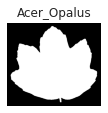

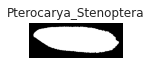

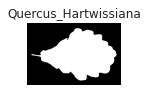

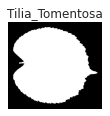

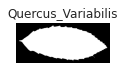

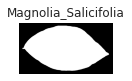

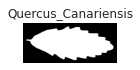

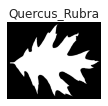

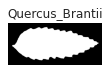

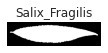

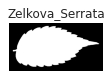

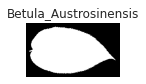

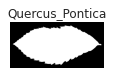

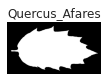

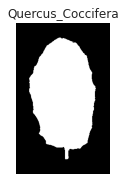

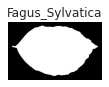

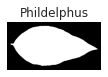

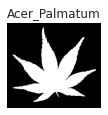

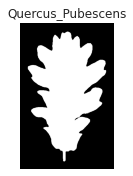

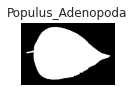

In [8]:
import cv2
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
def load_images_from_folder():
    counter = 1
    images = []
    for i in range(len(all_data.index)):
            images.append(f'/content/images/{all_data.index[i]}.jpg')
    return images

images = load_images_from_folder()
for i in range(20):
    fig = plt.figure(figsize=(40,30))
    a=fig.add_subplot(1,20,i+1)
    image = imread(images[i])
    imshow(image,cmap='Greys_r',aspect="equal")
    plt.title(all_data.loc[all_data.index[i], 'species'])
    axis('off')

It is clear that all species have equal 10 samples  * 99 species = 990 for 
training 

In [9]:
corr = all_data.corr()

corr.style.background_gradient(cmap="Spectral")

## 3- Preprocessing

## 3.1- Convert datatype

In [10]:
#convert all object columns to string column
all_data[all_data.select_dtypes(['object']).columns] = all_data.select_dtypes(['object']).apply(lambda x: x.astype('string'))
all_data.info()  #to check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), string(1)
memory usage: 1.5 MB


## 3.2 Check for duplicates or missing values

In [11]:
all_data.duplicated().sum()

0

In [12]:
print(all_data[all_data.duplicated()])


Empty DataFrame
Columns: [species, margin1, margin2, margin3, margin4, margin5, margin6, margin7, margin8, margin9, margin10, margin11, margin12, margin13, margin14, margin15, margin16, margin17, margin18, margin19, margin20, margin21, margin22, margin23, margin24, margin25, margin26, margin27, margin28, margin29, margin30, margin31, margin32, margin33, margin34, margin35, margin36, margin37, margin38, margin39, margin40, margin41, margin42, margin43, margin44, margin45, margin46, margin47, margin48, margin49, margin50, margin51, margin52, margin53, margin54, margin55, margin56, margin57, margin58, margin59, margin60, margin61, margin62, margin63, margin64, shape1, shape2, shape3, shape4, shape5, shape6, shape7, shape8, shape9, shape10, shape11, shape12, shape13, shape14, shape15, shape16, shape17, shape18, shape19, shape20, shape21, shape22, shape23, shape24, shape25, shape26, shape27, shape28, shape29, shape30, shape31, shape32, shape33, shape34, shape35, ...]
Index: []

[0 rows x 19

There is no duplicates

## 3.3 Correlation analysis

In [13]:
x=all_data.drop('species', axis=1)
cor_matrix = x.corr().abs()
#print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop= [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [14]:
print(to_drop)
print(len(to_drop))
#all_data.drop(to_drop, axis=1,inplace=True)

['shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape23', 'shape24', 'shape25', 'shape26', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape39', 'shape40', 'shape41', 'shape42', 'shape43', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape52', 'shape53', 'shape54', 'shape55', 'shape56', 'shape57', 'shape58', 'shape59', 'shape60', 'shape61', 'shape62', 'shape63', 'shape64']
63


## 4- Split Data

In [15]:
X = all_data.drop('species',axis = 1)
y, uniques = pd.factorize(all_data['species'])  # it returns the encoded labels with numbers

X_tr, X_val, y_tr, y_val = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=42)


**It is clear that the data is already normalized 
,We could see that in DF.describe()**

In [16]:
#Function that normalize the data if you need it.
def Normailzation(X_tr, X_ts):
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_val = scaler.transform(X_ts)
    return X_tr, X_ts


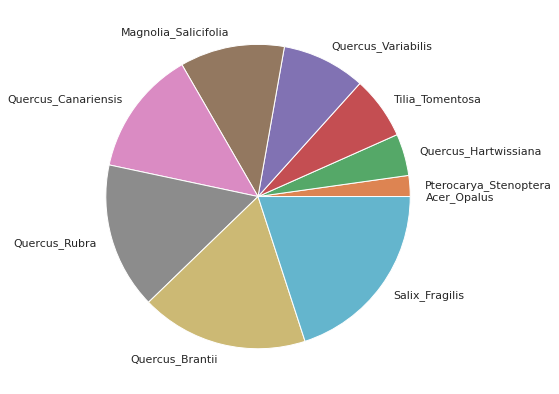

In [17]:
#  Sample of the species
fig = plt.figure(figsize =(10, 7))
plt.pie(y[:10],labels=all_data['species'][:10]);

# Part 2: Part II: Training a neural network

## Building our artificial neural network

In [18]:
keras.backend.clear_session()  #Clear the session to remove weights 

def create_ANN(hyperparameter):
  """
  function to create model that tuner will search for best hyperparameter within this model.
  build a neural network archeticture.
  """
  #search for best learning rate
  LR = hyperparameter.Float('learning_rate',min_value=1e-5,max_value=0.1,sampling='LOG',default=1e-3)
  #search for best hidden units number
  hidden_neurons = hyperparameter.Int('hidden_units',min_value=32,max_value=512,step=32,default=128)
  #search for best dropout rate
  hidden_dropout =  hyperparameter.Float('hidden_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05)
  #search for l1 reguralization for hidden units values
  l1_penalty_hidden = hyperparameter.Float('l1_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  #search for l2 reguralization for hidden units values
  l2_penalty_hidden = hyperparameter.Float('l2_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  #search for l2 reguralization for hidden layer bias value
  l2_penalty_hidden_bias = hyperparameter.Float('l2_penalty_hidden_bias',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)
  
  #create your model
  ANN = Sequential()
  ANN.add(Dense(units=hidden_neurons,input_dim=192,kernel_regularizer=regularizers.l1_l2(l1=l1_penalty_hidden, l2=l2_penalty_hidden),
                bias_regularizer=regularizers.l2(l2_penalty_hidden_bias), activation='tanh'))        #input + hidden layer
  ANN.add(Dropout(rate = hidden_dropout))   # dropout layer
  ANN.add(Dense(99, activation='softmax'))   #Output layer
  optimizer = Adam(learning_rate=LR)
  ANN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])   #multiclass
  ANN.build(X_tr.shape)
  print(ANN.summary())
  return ANN

### create tuner  object and add the create_ANN function to it

In [19]:
#objective parameter is to find the best hyperparameter combination that find best val_accuracy
#directory: folder in the same path of your code to save your search project
#project name: search session which have the trials of search (very useful)
"""
overwrite: Do you want to overwrite your project or not if 'False' it will use the previous tuning trial results and will use them if 'True' 
it will start searching for best hyperparameters from scratch 
"""
#hyperband search it's faster than bayesian search and better than randomized search in selecting best hyperparameters
tuner = kt.Hyperband(create_ANN,
                     objective='val_accuracy',
                     max_epochs=300,
                     directory='my_dir',
                     factor = 3,
                     project_name='zeyad',
                     overwrite = True)


# REf https://www.tensorflow.org/tutorials/keras/keras_tuner

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               24704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                12771     
                                                                 
Total params: 37,475
Trainable params: 37,475
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [21]:
start_time = time()

#search for best hyperparameters to find best validation accuracy
tuner.search(X_tr, y_tr, epochs=100, validation_data=(X_val,y_val), use_multiprocessing=True, workers=6, callbacks=[stop_early])

# Get the optimal hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #get the number 1 best hyperparametes

print("\t\t\t\t\t\tThe best hyperparameters search is complete.\n")
print(f"The optimal number of units in the hidden layer is {best_hps.get('hidden_units')}, the best dropout in this layer is {best_hps.get('hidden_dropout')}, best L1 and L2 regulaizers values are ({best_hps.get('l1_penalty_hidden')},{best_hps.get('l2_penalty_hidden')},{best_hps.get('l2_penalty_hidden_bias')}).")
print(f"the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

end_time = time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters was: {result}")

Trial 725 Complete [00h 00m 02s]
val_accuracy: 0.03030303120613098

Best val_accuracy So Far: 0.939393937587738
Total elapsed time: 00h 31m 12s
INFO:tensorflow:Oracle triggered exit
						The best hyperparameters search is complete.

The optimal number of units in the hidden layer is 192, the best dropout in this layer is 0.15000000000000002, best L1 and L2 regulaizers values are (0.0,0.0,0.003).
the optimal learning rate for the optimizer is 0.046367580487337315.
The total time taken to search for best hyperparameters was: 31 minutes and 13 seconds.


In [22]:
#for what did you search
tuner.search_space_summary()

Search space summary
Default search space size: 6
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
hidden_units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
hidden_dropout (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
l1_penalty_hidden (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.01, 'step': 0.0015, 'sampling': None}
l2_penalty_hidden (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.01, 'step': 0.0015, 'sampling': None}
l2_penalty_hidden_bias (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.01, 'step': 0.0015, 'sampling': None}


In [23]:
tuner.results_summary()

Results summary
Results in my_dir/zeyad
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.046367580487337315
hidden_units: 192
hidden_dropout: 0.15000000000000002
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 5
tuner/round: 3
tuner/trial_id: 549cd885e8cf0dcd0d1b1ec0f07c2802
Score: 0.939393937587738
Trial summary
Hyperparameters:
learning_rate: 0.046367580487337315
hidden_units: 192
hidden_dropout: 0.15000000000000002
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 5
tuner/round: 4
tuner/trial_id: 8ddc22315e6d41d41424b942e5d76245
Score: 0.9242424368858337
Trial summary
Hyperparameters:
learning_rate: 0.046367580487337315
hidden_units: 192
hidden_dropout: 0.15000000000000002
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tu

In [24]:
# Get the optimal 10 hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=10)[:]


best_hidden_units = []
best_learning_rates = []
best_hidden_l2 = []

best_hidden_l1 = []
best_hidden_l2_bias = []

best_dropout_rate = []
for i in range(10):
  best_hidden_units.append(best_hps[i].get('hidden_units'))
  best_learning_rates.append(best_hps[i].get('learning_rate'))
  best_hidden_l2.append(best_hps[i].get('l2_penalty_hidden'))
  best_hidden_l1.append(best_hps[i].get('l1_penalty_hidden'))
  best_hidden_l2_bias.append(best_hps[i].get('l2_penalty_hidden_bias'))
  best_dropout_rate.append(best_hps[i].get('hidden_dropout'))


best_hps = pd.DataFrame({'Learning rate':best_learning_rates, 
                            'Best hidden units number':best_hidden_units,
                            'Best hidden units L2':best_hidden_l2,
                            'Best hidden L1':best_hidden_l1,
                            'Best hidden L2 bias':best_hidden_l2_bias,
                            'Best Dropout Rate':best_dropout_rate})



best_hps.style.set_table_attributes("style='display:inline'").set_caption('Best combination of hyperparameter values')
best_hps.style.set_table_attributes("style='display:inline'").set_caption('Best combination of hyperparameter values')
best_hps.drop_duplicates(inplace=True)
best_hps.reset_index(drop=True,inplace=True)
best_hps

Learning rate  Best hidden units number  Best hidden units L2  \
0       0.046368                       192                0.0000   
1       0.015064                       160                0.0000   
2       0.000400                       384                0.0000   
3       0.011498                       192                0.0030   
4       0.039646                       128                0.0015   

   Best hidden L1  Best hidden L2 bias  Best Dropout Rate  
0          0.0000               0.0030               0.15  
1          0.0015               0.0075               0.30  
2          0.0000               0.0015               0.30  
3          0.0000               0.0060               0.10  
4          0.0015               0.0060               0.30

### Rebuild the model but this time with best hyperparameters

In [25]:
def build_model(best_values):
    """
    function to build a sequential neural network

    Parameters:

    hidden_units (int): number of hidden units in your neural network
    learning_rate (float or int): value of learning rate that will help model to convergence
    dropout (float): value of dropout in the hidden layer
    L1 (float): value of lasso regularizer of hidden units weights
    L2 (float): value of ridge regularizer of hidden units weights
    L2_bias: value of ridge regularizer of hidden units bias

    Return:

    your model
    """
    keras.backend.clear_session()
    ANN = Sequential()

    ANN.add(Dense(units=best_values[1],input_dim=X.shape[1],kernel_regularizer=regularizers.l1_l2(l1=best_values[3], l2=best_values[2]),bias_regularizer=regularizers.l2(best_values[4]), activation='tanh'))

    ANN.add(Dropout(rate = best_values[5]))
    ANN.add(Dense(99, activation='softmax'))
    optimizer = Adam(learning_rate=best_values[0])
    ANN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    ANN.build(X.shape)
    print(ANN.summary())
    return ANN

In [26]:
import random
import tensorflow as tf
def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)
    print("RANDOM SEEDS RESET")

### Create 5 models from each model has different hyperparameters but they are the best

In [27]:
def createBest_5Models(best_hyperparameters):
  """
  function to create different 5 models with different hyperparameters (best hyperparameters)

  Parameters

  best_hyperparameters (df or 2d numpy): your best hyperparameters
  """
  models = []
  for i in range(len(best_hyperparameters)):
      reset_seeds()
      #notice here that I called funtion "build_model" for five times so it'll create different 5 models and pass different hyperparameters to each model
      models.append(build_model(best_hyperparameters.iloc[i]))

  return models

In [28]:
def train_all_models(models,batchSize):
  """
  function to train all created models and plot training loss vs validation loss for each model and plot training accuracy vs validation accuracy for each model.
  Parameters

  models (list): all your sequential models
  batchSize (int): batch size assigned to each model

  Return

  None
  """

  stop_early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
  for i in range(len(models)):
    keras.backend.clear_session()
    history = models[i].fit(X_tr, y_tr, epochs=150,batch_size = batchSize, validation_data=(X_val,y_val),callbacks=[stop_early],verbose = 0)
    val_loss_per_epoch = history.history['val_loss']
    loss_per_epoch = history.history['loss']
    val_accuracy_per_epoch = history.history['val_accuracy']
    accuracy_per_epoch = history.history['accuracy']
    plt.figure(figsize=(8,8))
    plt.title(f"model number {i+1} training loss & validation loss with batch size {batchSize}")
    plt.xlabel('epoch')
    plt.ylabel('loss function')
    plt.plot(np.arange(1,len(val_loss_per_epoch)+1),val_loss_per_epoch,label="validation loss")
    plt.plot(np.arange(1,len(loss_per_epoch)+1),loss_per_epoch,label = "training loss")
    plt.legend(loc="upper left")
    plt.show()
    plt.figure(figsize=(8,8))
    plt.title(f"model number {i+1} training accuracy & validation accuracy with batch size {batchSize}")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(np.arange(1,len(val_accuracy_per_epoch)+1),val_accuracy_per_epoch,label="validation accuracy")
    plt.plot(np.arange(1,len(accuracy_per_epoch)+1),accuracy_per_epoch,label = "training accuracy")
    plt.legend(loc="upper left")
    plt.show()


In [29]:
def evaluate_model(models,X_tr,X_val,y_tr,y_val):
  """
  function to evaluate all created models.
  log_loss metric and categorical accuracy metric
  
  Parameters

  models (list): all your sequential models
  X_tr (dataframe or numpy): your training input
  X_val (dataframe or numpy): your validation input
  y_tr (dataframe or numpy): your training label
  y_val (dataframe or numpy): your validation label

  Return

  it will return 4 lists:

  1- training_loss: contains values of each average training loss per model (if you passed to the function 5 model it will return to you 5 average training losses)
  2- validation_loss: contains values of each average validation loss per model (if you passed to the function 5 model it will return to you 5 average validation losses)
  3- training_accuracy: contains values of each average training accuracy per model (if you passed to the function 5 model it will return to you 5 average training accuracies)
  4- validation_accuracy: contains values of each average validation accuracy per model (if you passed to the function 5 model it will return to you 5 average validation accuracies)
  """
  training_loss = []
  validation_loss =[]
  training_accuracy = []
  validation_accuracy = []
  #get the training and validation loss/accuracy for best 5 models and 3 batch sizes (15 models in total)
  for i in range(len(models)):
    training_loss.append(models[i].evaluate(X_tr, y_tr)[0])
    validation_loss.append(models[i].evaluate(X_val,y_val)[0])
    training_accuracy.append(models[i].evaluate(X_tr, y_tr)[1])
    validation_accuracy.append(models[i].evaluate(X_val,y_val)[1])
  return training_loss, validation_loss, training_accuracy, validation_accuracy

In [30]:
def plot_each_model_acc_loss(tr_loss,val_loss,tr_acc,val_acc,batchsize):

  """
  function to plot each model avg_accuracy and avg_loss in one img

  Parameters

  tr_loss (list): contains values of each average training loss per model.
  val_lss (list): contains values of each average validation loss per model.
  tr_acc (list): contains values of each average training accuracy per model.
  val_acc (list): contains values of each average validation accuracy per model.

  Return

  None


  """ 
  plt.figure(figsize=(15,10))
  plt.plot(np.arange(1,6),tr_loss,label=("average training model loss"))
  plt.plot(np.arange(1,6),val_loss,label=("average validation model loss"))
  plt.xticks(np.arange(1,6,1))
  plt.xlabel(f"Model number with different compinations of hyperparameters values and {batchsize} batch size")
  plt.ylabel("loss")
  #plt.yticks(np.arange(0.0,7,0.5))
  plt.legend(loc="upper left")
  plt.show()
  plt.figure(figsize=(15,10))
  plt.plot(np.arange(1,6),tr_acc,label=("average training model accuracy"))
  plt.plot(np.arange(1,6),val_acc,label=("average validation modle accuracy"))
  plt.xticks(np.arange(1,6,1))
  plt.xlabel(f"Model number with different compinations of hyperparameters values and {batchsize} batch size")
  plt.ylabel("accuracy")
  plt.legend(loc="upper left")
  plt.show()

#Trails

## 1st trail with batch_size = 16

RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               37056     
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                19107     
                                                                 
Total params: 56,163
Trainable params: 56,163
Non-trainable params: 0
_________________________________________________________________
None
RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               30880     
                                                       

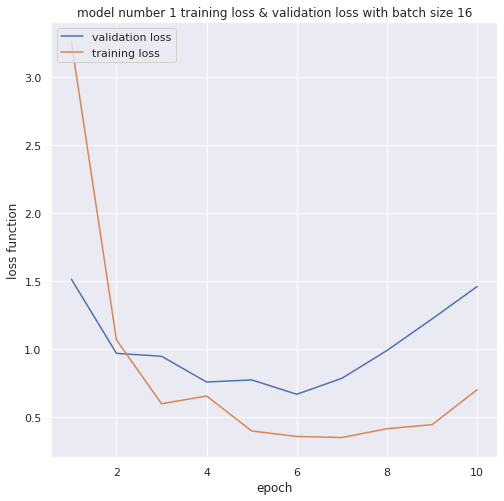

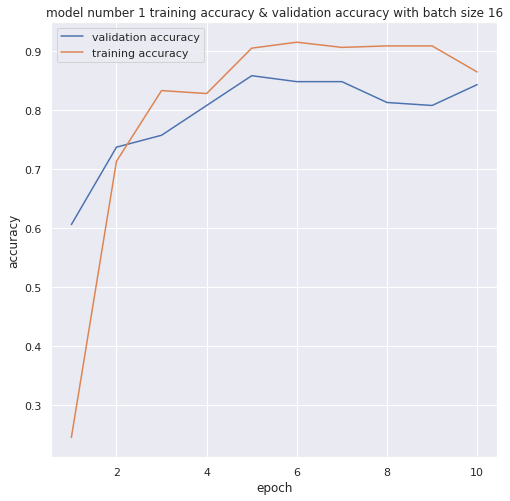

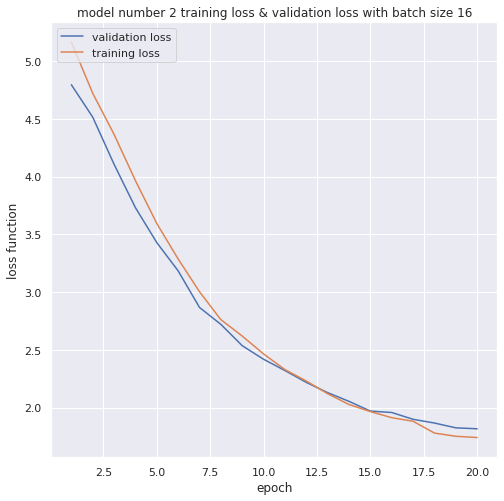

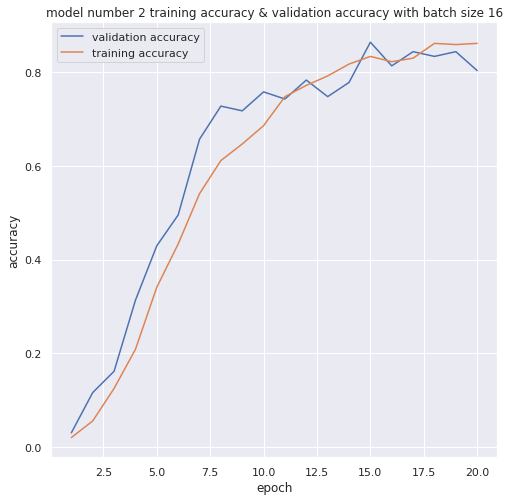

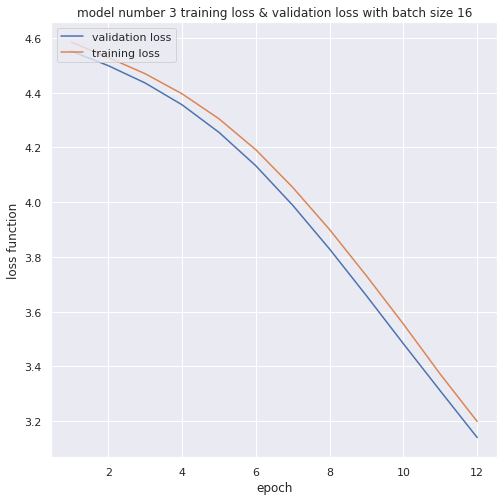

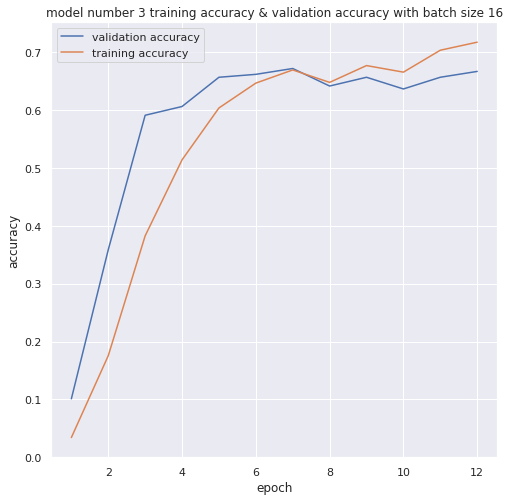

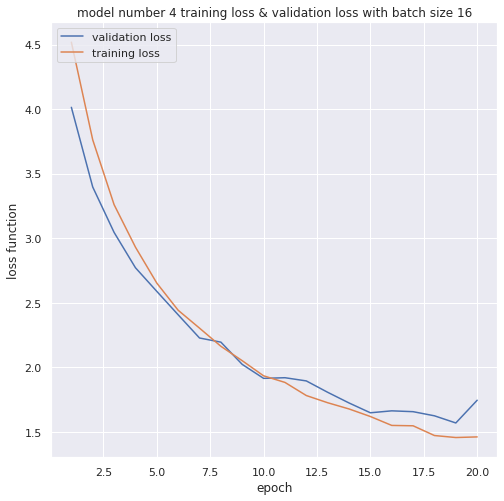

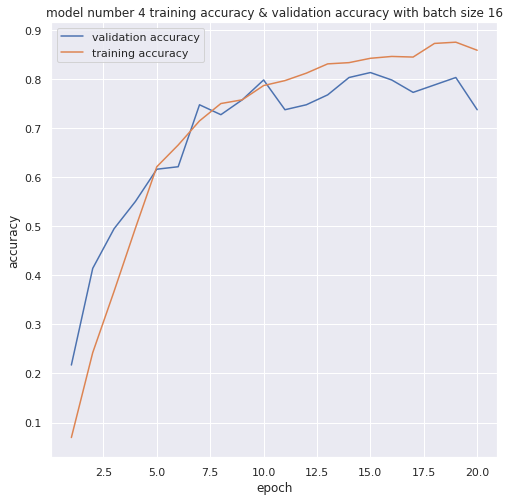

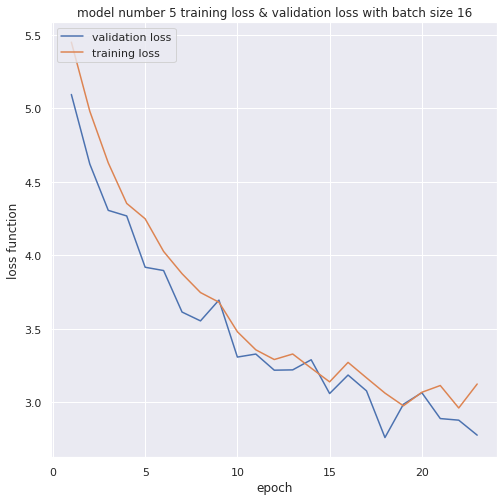

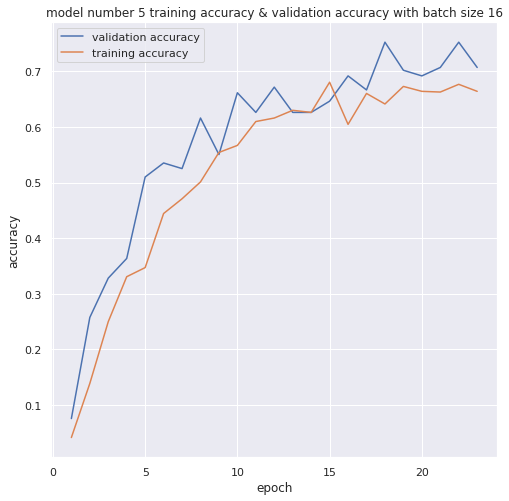

7/7 [==============================] - 0s 3ms/step - loss: 2.7769 - accuracy: 0.7071


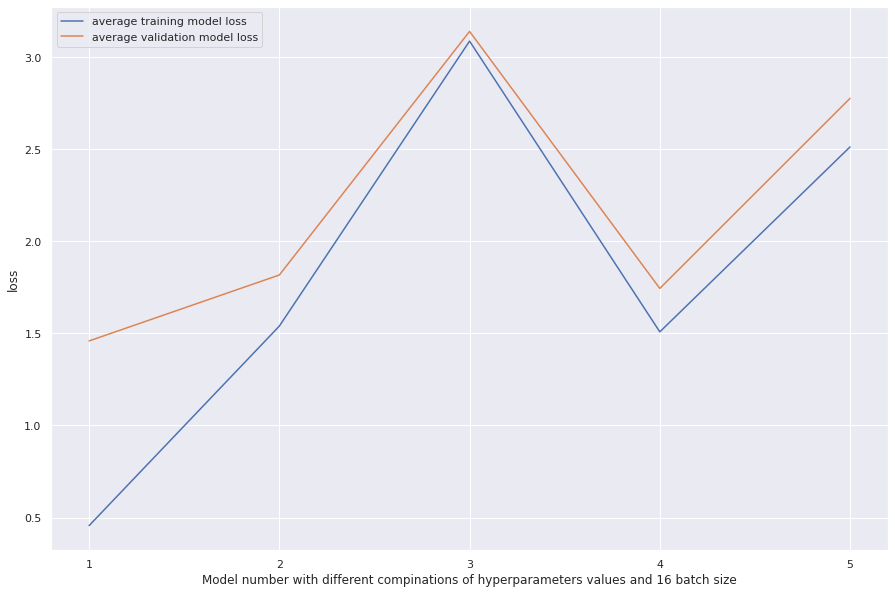

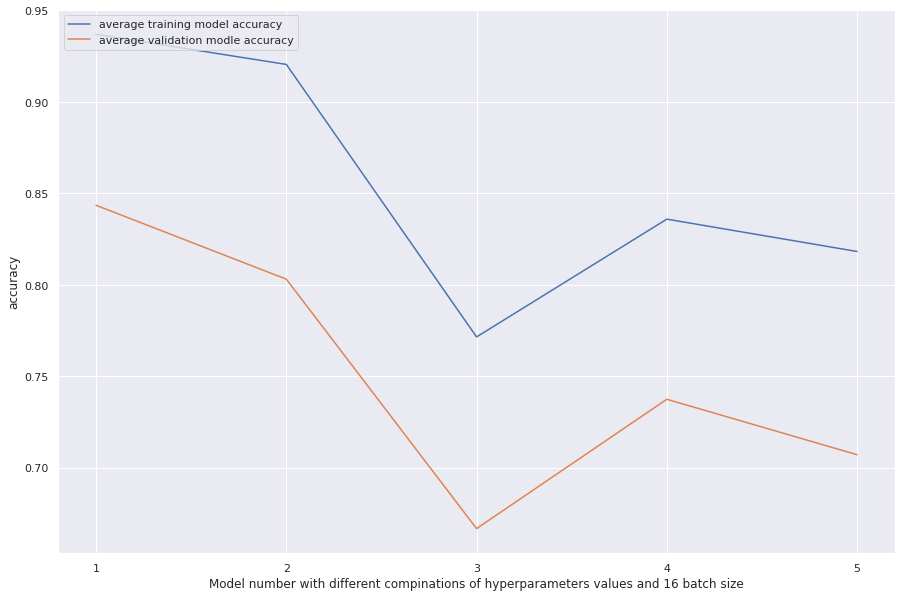

In [31]:
#Batch_size  16
models = createBest_5Models(best_hps)
#try 5 models with batch size 16
train_all_models(models,16)
avg_training_loss_1, avg_validation_loss_1, avg_training_accuracy_1, avg_validation_accuracy_1 = evaluate_model(models,X_tr,X_val,y_tr,y_val)
plot_each_model_acc_loss(avg_training_loss_1,avg_validation_loss_1,avg_training_accuracy_1,avg_validation_accuracy_1,16)

## 2nd trail with batch_size = 32

RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               37056     
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                19107     
                                                                 
Total params: 56,163
Trainable params: 56,163
Non-trainable params: 0
_________________________________________________________________
None
RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               30880     
                                                       

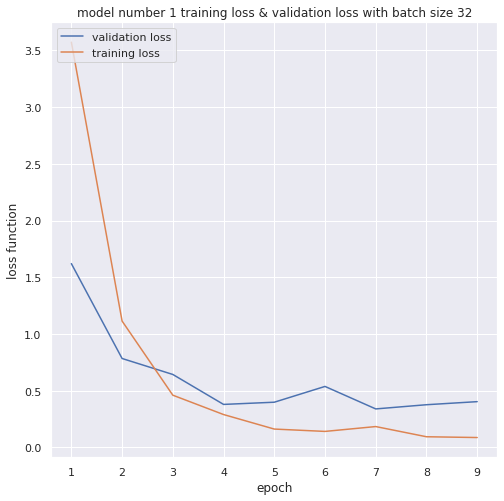

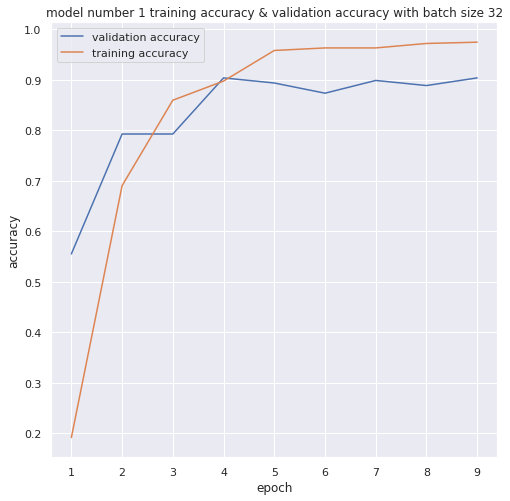

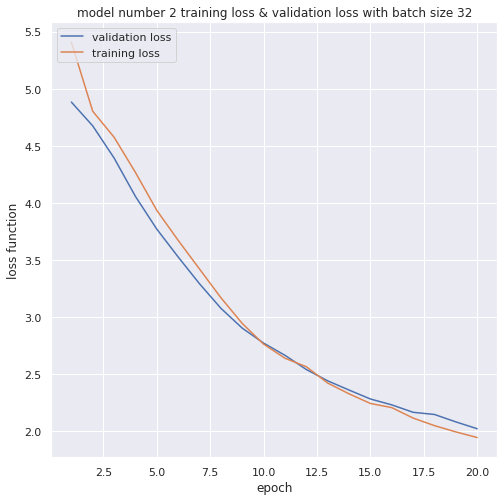

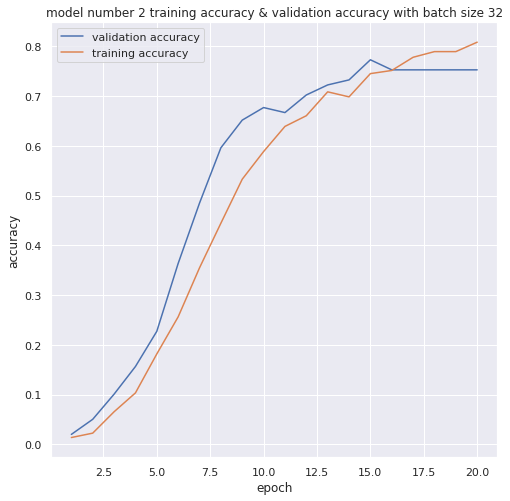

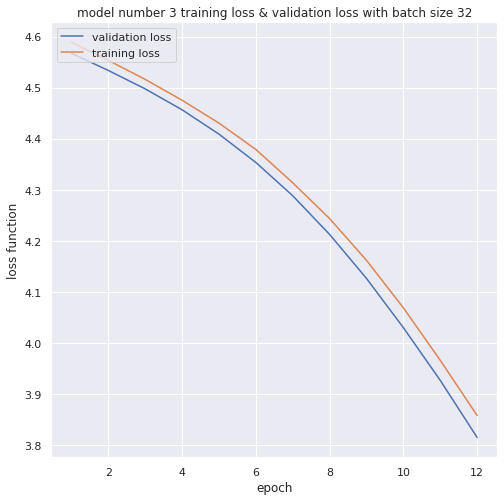

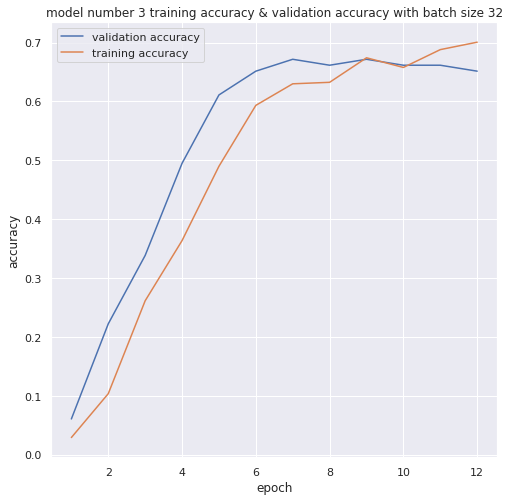

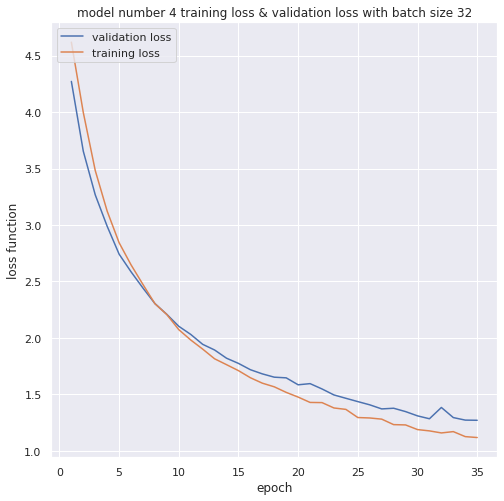

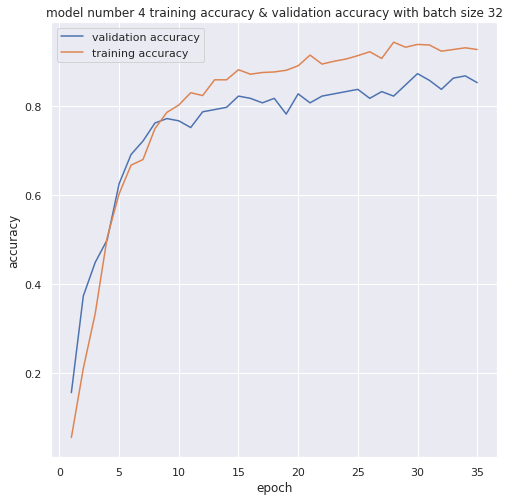

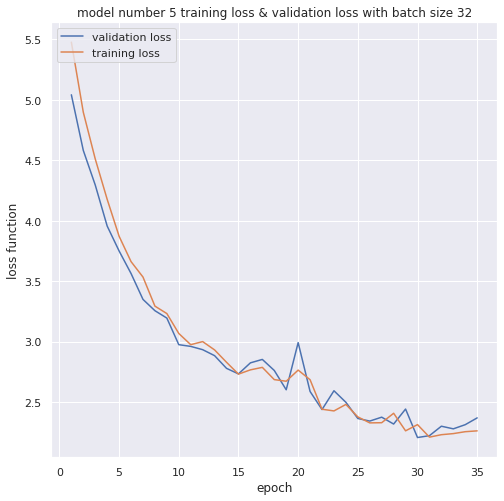

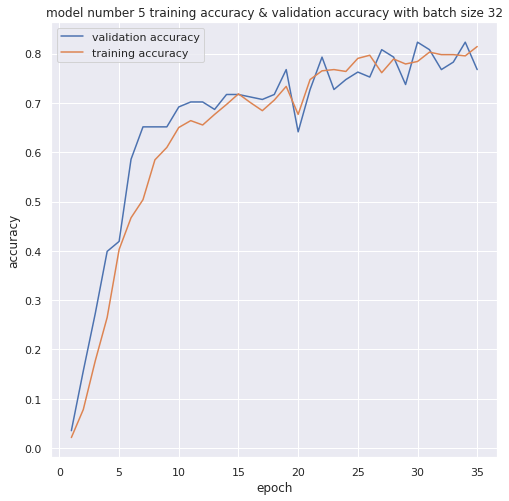

7/7 [==============================] - 0s 4ms/step - loss: 2.3690 - accuracy: 0.7677


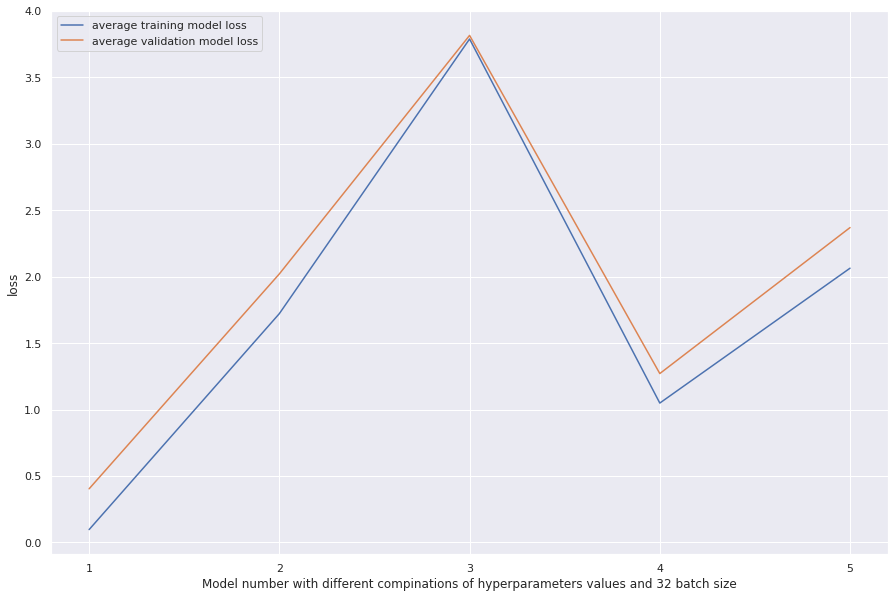

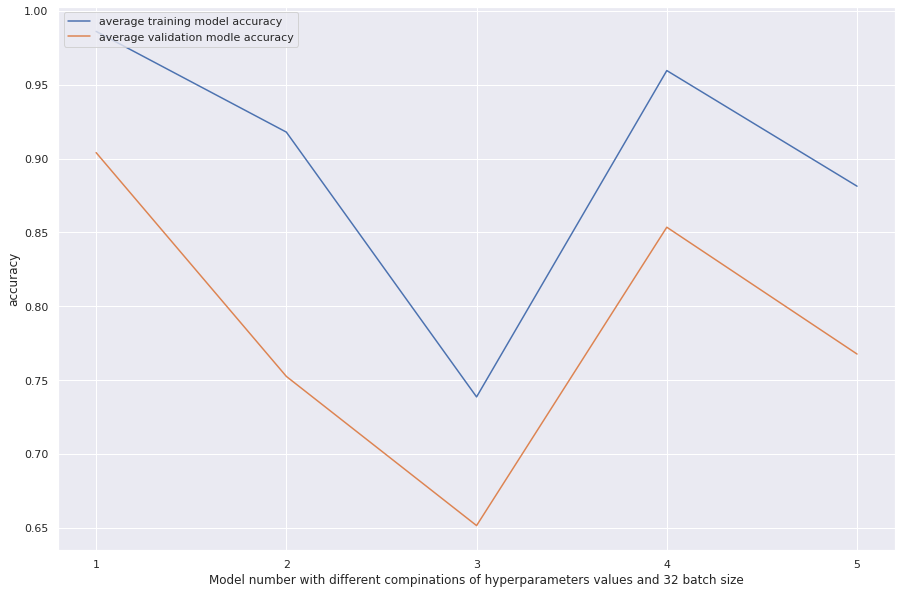

In [32]:
#Batch_size  32

models = createBest_5Models(best_hps)
#try 5 models with batch size 32

train_all_models(models,32)
avg_training_loss_2, avg_validation_loss_2, avg_training_accuracy_2, avg_validation_accuracy_2 = evaluate_model(models,X_tr,X_val,y_tr,y_val)
plot_each_model_acc_loss(avg_training_loss_2,avg_validation_loss_2,avg_training_accuracy_2,avg_validation_accuracy_2 ,32)

## 3rd trail with batch_size = 64

RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               37056     
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                19107     
                                                                 
Total params: 56,163
Trainable params: 56,163
Non-trainable params: 0
_________________________________________________________________
None
RANDOM SEEDS RESET
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               30880     
                                                       

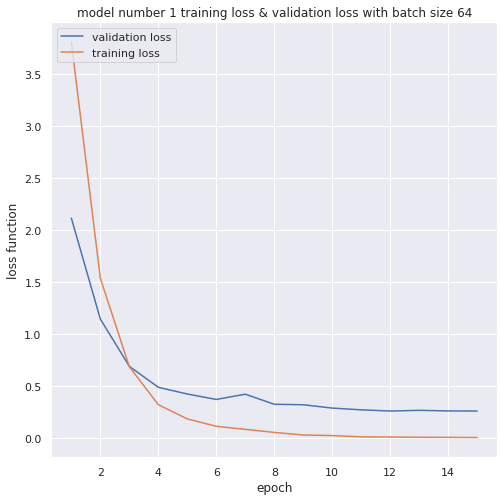

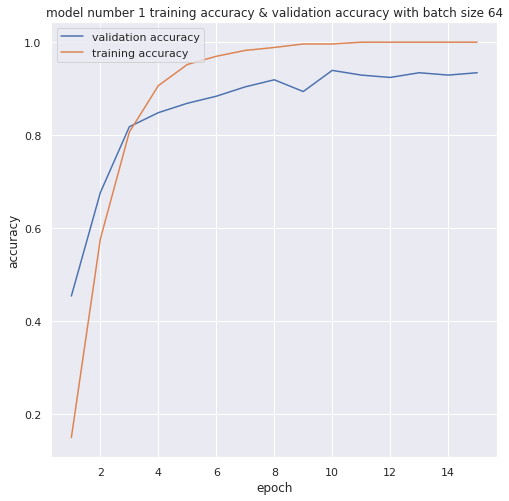

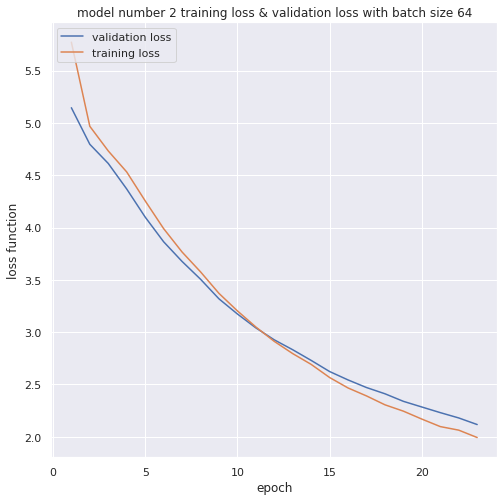

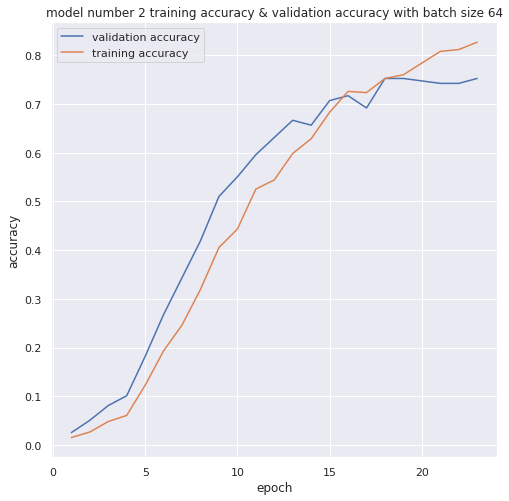

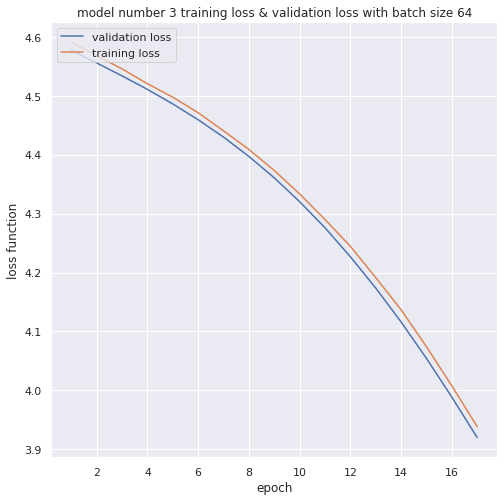

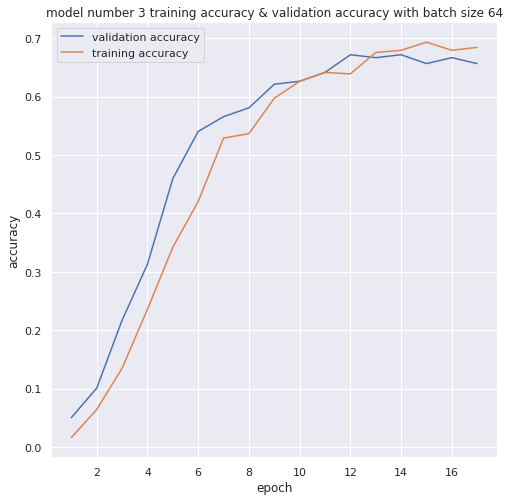

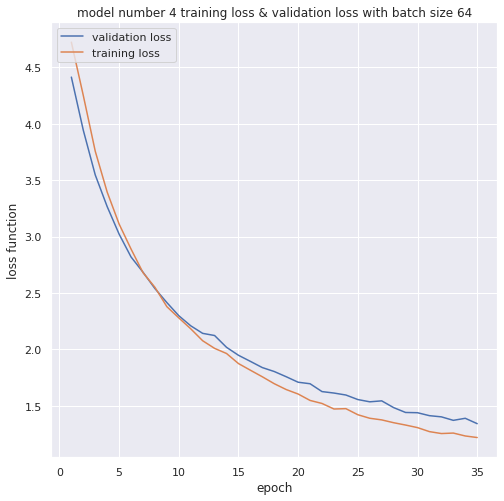

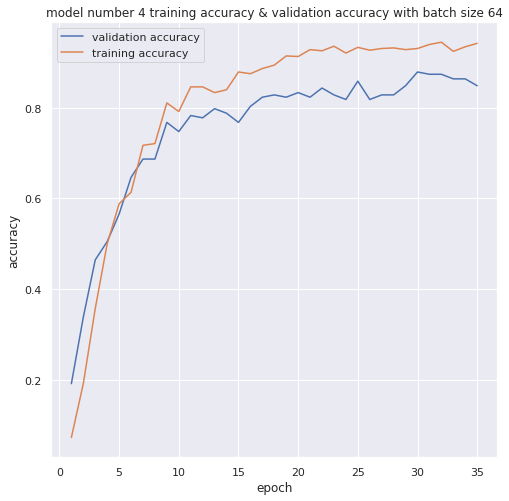

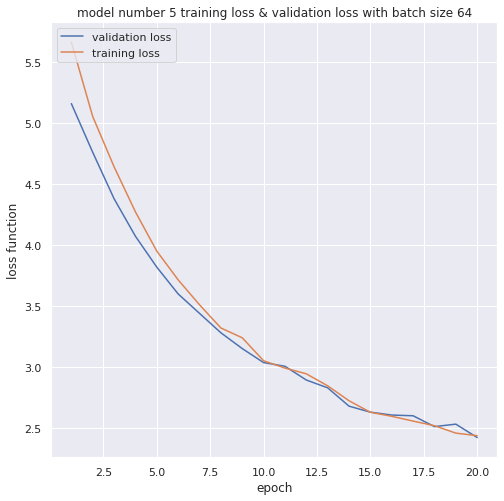

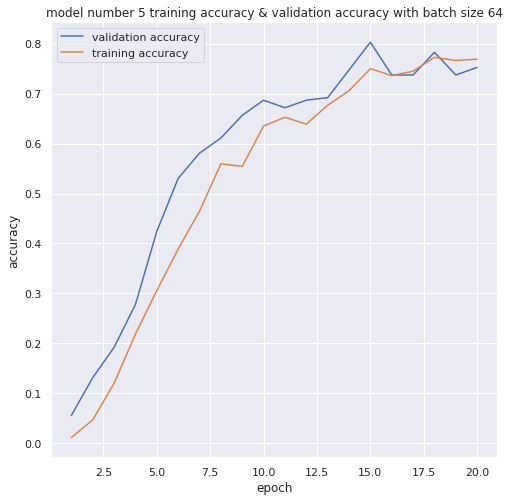

7/7 [==============================] - 0s 3ms/step - loss: 2.4235 - accuracy: 0.7525


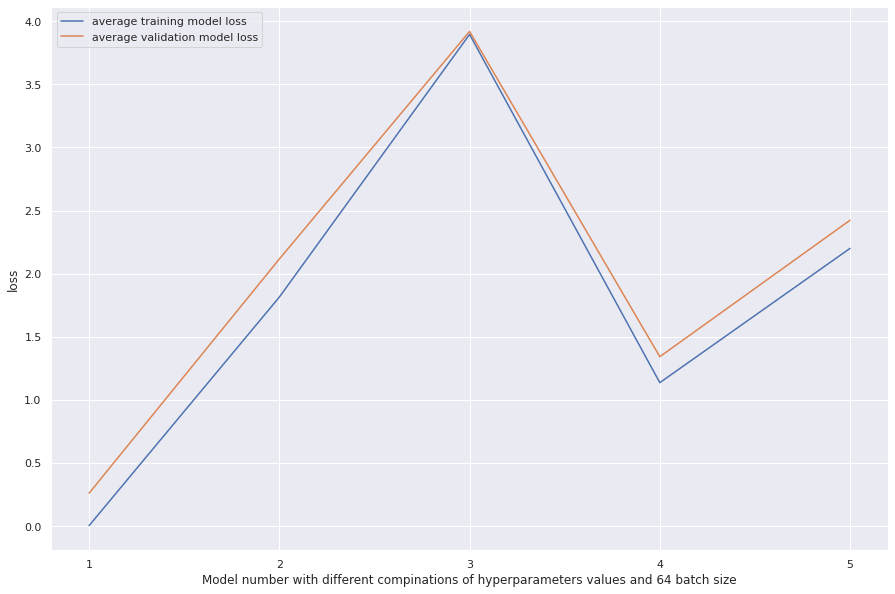

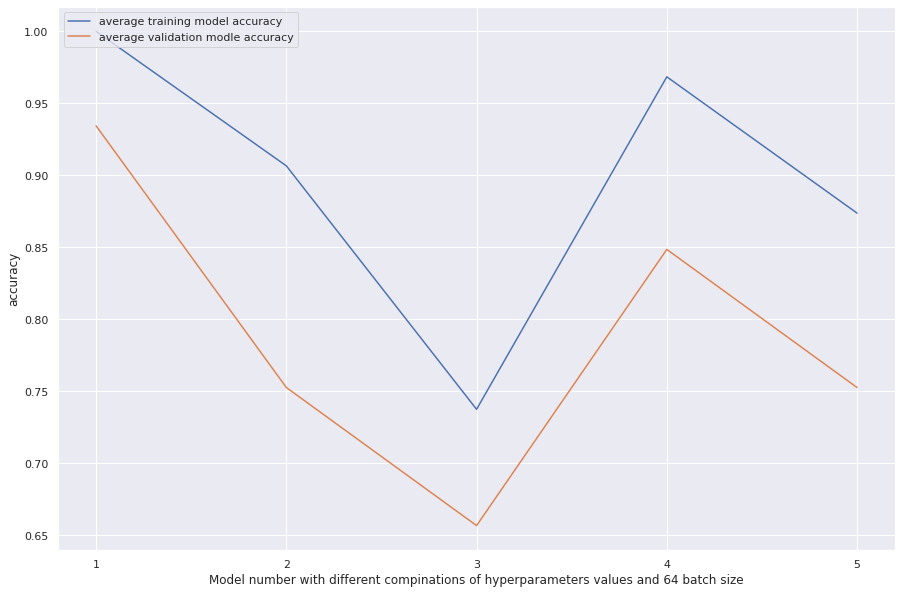

In [33]:
#Batch_size  64

models = createBest_5Models(best_hps)
#try 5 models with batch size 64
train_all_models(models,64)
avg_training_loss_3, avg_validation_loss_3, avg_training_accuracy_3, avg_validation_accuracy_3 = evaluate_model(models,X_tr,X_val,y_tr,y_val)
plot_each_model_acc_loss(avg_training_loss_3,avg_validation_loss_3,avg_training_accuracy_3,avg_validation_accuracy_3,64)

## the best values

Each list here have different values for each batch size

In [34]:
print(f"""five models validation loss with batch size 16 {avg_validation_loss_1} and the best model was model
 {avg_validation_loss_1.index(min(avg_validation_loss_1))+1} and validation accuracy with batch size 16 {avg_validation_accuracy_1} and the best model was model {avg_validation_accuracy_1.index(max(avg_validation_accuracy_1))+1}\n\n""")

print(f"""five models validation loss with batch size 32 {avg_validation_loss_2} and the best model was model
 {avg_validation_loss_2.index(min(avg_validation_loss_2))+1} and validation accuracy with batch size 16 {avg_validation_accuracy_2} and the best model was model {avg_validation_accuracy_2.index(max(avg_validation_accuracy_2))+1}\n\n""")

print(f"""five models validation loss with batch size 64 {avg_validation_loss_3} and the best model was model
 {avg_validation_loss_3.index(min(avg_validation_loss_3))+1} and validation accuracy with batch size 16 {avg_validation_accuracy_3} and the best model was model {avg_validation_accuracy_3.index(max(avg_validation_accuracy_3))+1}\n\n""")


five models validation loss with batch size 16 [1.459202766418457, 1.817238450050354, 3.1403920650482178, 1.7442669868469238, 2.7768640518188477] and the best model was model
 1 and validation accuracy with batch size 16 [0.8434343338012695, 0.8030303120613098, 0.6666666865348816, 0.7373737096786499, 0.7070707082748413] and the best model was model 1


five models validation loss with batch size 32 [0.40393945574760437, 2.020517587661743, 3.8146913051605225, 1.2708925008773804, 2.3690359592437744] and the best model was model
 1 and validation accuracy with batch size 16 [0.9040403962135315, 0.752525269985199, 0.6515151262283325, 0.8535353541374207, 0.7676767706871033] and the best model was model 1


five models validation loss with batch size 64 [0.2606773376464844, 2.1163594722747803, 3.9199368953704834, 1.3419238328933716, 2.423539638519287] and the best model was model
 1 and validation accuracy with batch size 16 [0.9343434572219849, 0.752525269985199, 0.6565656661987305, 0.84848

## Winner model

### from about results the winner model after creating and training 15 models is the model number 1 and that's natural because the first hyperparameters are the best and the ones who got best validation accuracy.

hyperparameters: 
- Learning rate: 0.046368
- Best hidden units number: 192
- Best hidden units L2: 0.0000
- Best hidden L1: 0.0000
- Best hidden L2 bias:
- Best Dropout Rate: 	0.0030
- Best batch size: 64

validation accuracy is 93.43%

Could we get best validation accuracy?

yes, by increasing the number of max_epochs in 'kt.tuner()' and the number of epochs  in tuner.search but this will increase the time of searching.